<a href="https://colab.research.google.com/github/rlfwo93/machine-learning/blob/master/CnnModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **모듈 불러오기**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.__version__


'2.3.0'

# **구글드라이브 연동**

In [38]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
from IPython.display import Image

Mounted at /gdrive


# **데이터 정규화**

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
(x_image,y_image),(x_testimage,y_testimage) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
#mnist는 흑백 이미지이기 때문에 채널이1. 그래서 채널1값이 들어갈 차원을 추가

print("x_train.shape{0}".format(x_train.shape))
print("x_test.shape{0}".format(x_test.shape))

x_train = x_train/255.0
x_test = x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape(60000, 28, 28, 1)
x_test.shape(10000, 28, 28, 1)


# **원핫 인코딩**
- 표현하고 싶은 데이터의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여

In [27]:
y_test1 = tf.keras.utils.to_categorical(y_test,10)
y_train1 = tf.keras.utils.to_categorical(y_train,10)

numpy.ndarray

원핫 인코딩 예시


사과 : [1,0,0,0]

배    : [0,1,0,0]

감    : [0,0,1,0]

포도 : [0,0,0,1]

# **CNN(합성곱 신경망)** 

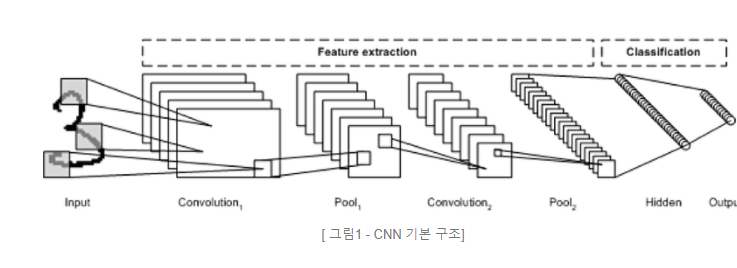

In [36]:
Image('/gdrive/My Drive/cnn/cnn구조.PNG')

- 필터 :  이미지의 특징을 찾아내기 위한 공용 파라미터. Filter를 Kernel이라고 하기도 함

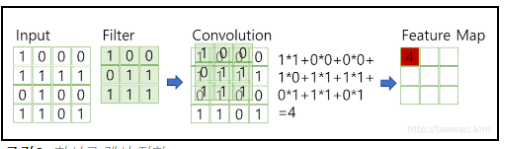

In [39]:
Image('/gdrive/My Drive/cnn/필터.PNG')

- 패딩 : Convolution 레이어의 출력 데이터가 줄어드는 것을 방지하는 방법이 패딩

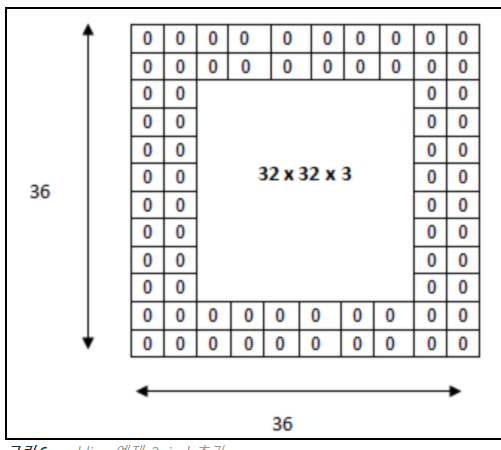

In [45]:
Image('/gdrive/My Drive/cnn/패딩.PNG')

- Pooling : 풀링 레이어는 컨볼류션 레이어의 출력 데이터를 입력으로 받아서 출력 데이터(Activation Map)의 크기를 줄이거나 특정 데이터를 강조하는 용도로 사용

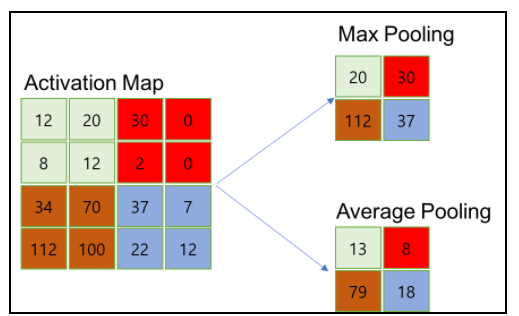

In [47]:
Image('/gdrive/My Drive/cnn/폴링.PNG')

# **CNN(합성곱 신경망)모델** 

In [28]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 16,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(1,1)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),strides=(1,1),filters=32,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(1,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10,activation="softmax")

])
cnn.compile(optimizer= "adam",
         loss='categorical_crossentropy',
              metrics=['accuracy'])

-  대상이 원-핫 인코딩 된 경우 categorical_crossentropy
-  정수이면 sparse_categorical_crossentropy

# **CNN모델 구조 확인**

In [33]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

# **cnn 모델 학습하기**

In [29]:
cnn.fit(x_train,y_train1,epochs=20,batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 153s 82ms/step - loss: 0.1137 - accuracy: 0.9656
Epoch 2/20
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0438 - accuracy: 0.9865
Epoch 3/20
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0308 - accuracy: 0.9906
Epoch 4/20
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0217 - accuracy: 0.9932
Epoch 5/20
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 6/20
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 7/20
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0121 - accuracy: 0.9959
Epoch 8/20
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 9/20
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0098 - accuracy: 0.9970
Epoch 10/20
1875/1875 [==============================] 

# **모델평가하기**

In [31]:
cnn.evaluate(x_test,y_test1,batch_size = 32)

313/313 [==============================] - 6s 19ms/step - loss: 0.0512 - accuracy: 0.9905


[0.0511668398976326, 0.9904999732971191]